# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 6 - Introduction to Sequence Models - </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/MLF/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1cApp099jwsJQudTjqGlUHapynRPbSoXJ?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>


The Objective of this session is to create a sequence model to predict the labels of the MNIST dataset

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Numpy implementation of a standard RNN

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1vXVUvFIFDxYo_sdil2QPJWSCwXwZj27f"></center>

In [ ]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting 
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

We have the following hyperparameters:

In [ ]:
N = 1000
T = 100
D = 50
d = 20

---
<font color=green>Q1:</font>
<br><font color='green'>
Generate some random data of shape (N, T, D).
</font>

---

In [ ]:
data = np.random.randn(N, T, D)
data.shape

(1000, 100, 50)

In [ ]:
data[0].shape

(100, 50)

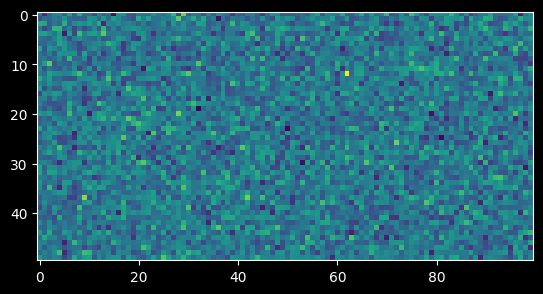

In [ ]:
plt.imshow(data[0].T)

---
<font color=green>Q2:</font>
<br><font color='green'>
Create some random weights $W_{hh}, W_{xh}, b_h$
</font>

---

In [ ]:
W_hh = np.random.random((d, d))
W_xh = np.random.random((D, d))
b_h = np.random.random((d,))

---
<font color=green>Q3:</font>
<br><font color='green'>
Generate the output tensor of shape (N, T, d) by creating the sequence $y_1, \dots, y_T$ associated with each sequence $x_1, \dots, x_T$. 
</font>

---

In [ ]:
# Initialize the output tensor 
H = np.zeros((N, T, d))
# The number of samples
N = data.shape[0]
# Loop through all the N samples
for i in range(N):
  # Get the sequence i compose of T vectors of size D
  X = data[i] 
  # Initialize h_{0} with 0
  h_t_minus_one = np.zeros((d,))
  # Initialize an empty list for h_1, ..., h_T
  sequence_H = []
  # Loop through all the elements x_1, ..., x_T
  for x_t in X:
    # h_t = tanh(W_{xh}^T x_t + W_{hh}^T h_{t-1} + b_h)
    h_t = np.tanh(W_xh.T.dot(x_t) + W_hh.T.dot(h_t_minus_one) + b_h)
    # Put the output h_t in the list of outputs 
    sequence_H.append(h_t)
    # Update the new hidden state
    h_t_minus_one = h_t
  H[i] = np.asarray(sequence_H)

---
<font color=green>Q4:</font>
<br><font color='green'>
Plot the shape of the output:
</font>

---

In [ ]:
H.shape

(1000, 100, 20)

# 2. MNIST Classification using LSTMs

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1KNpBc60u1QCopXygOff0tLkQNkyXuSmr"></center>

We want to use the LSTM layer to classify the MNIST dataset.

The dataset is of shape (60000, 28, 28). 

Each sample is an image of shape (28, 28).

We can look at the image as a sequence of length T = 28, where each element is of dimension D = 28

## 2.1 Loading the MNIST dataset

---
<font color=green>Q5:</font>
<br><font color='green'>
Load the MNIST dataset using `tf.keras.datasets.mnist.load_data`
</font>

---

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


---
<font color=green>Q6:</font>
<br><font color='green'>
Plot the shape of the data
</font>

---

In [ ]:
X_train.shape

(60000, 28, 28)

---
<font color=green>Q7:</font>
<br><font color='green'>
Scale the feature train and test data by dividing each pixel element by 255
</font>

---

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

---
<font color=green>Q8:</font>
<br><font color='green'>
The targets are categories in $\{0, \dots, 9\}$. Create the tensor target of shape (N, 10) by one hot encoding the targets using `to_categorical` from `tensorflow.keras.utils`
</font>

---

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test,  num_classes = 10)

In [ ]:
y_train.shape

(60000, 10)

---
<font color=green>Q9:</font>
<br><font color='green'>
Create the following model and train it using gradient descent
</font>

---

<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1zCyhgITfxptmBzUDQ7-TPKsKugVyjtat"></center>

In [ ]:
# Set hyperparameters
T = X_train.shape[1]
D = X_train.shape[2]
d = 32
M = 64
N_epochs = 10

In [ ]:
# Import Modules
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

In [ ]:
# The input is an image of shape (T, D)
input_layer = Input(shape=(T, D))

# The LSTM layer 
lstm = LSTM(d, return_sequences=False)

# Apply the LSTM layer on the input 
y_T = lstm(input_layer) # output is N x d

# Apply a Dense layer with 10 neurons and a softmax activation function 
output = Dense(10, activation='softmax')(y_T)

# Create the model to map the input to the output 
model = Model(inputs=input_layer, outputs=output)
model.summary()

# Compile 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Train the model 
print('Training model...')
history = model.fit(X_train, y_train,
              batch_size=M, 
              epochs=N_epochs, 
              validation_split=0.3)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                7808      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________
Training model...
Epoch 1/10
657/657 [==============================] - 15s 20ms/step - loss: 0.9311 - accuracy: 0.6987 - val_loss: 0.4185 - val_accuracy: 0.8787
Epoch 2/10
657/657 [==============================] - 12s 19ms/step - loss: 0.3222 - accuracy: 0.9065 - val_loss: 0.2726 - val_accuracy: 0.9189
Epoch 3/10
657/65

---
<font color=green>Q10:</font>
<br><font color='green'>
Plot the training and the validation loss and the training and the validation accuracy
</font>

---

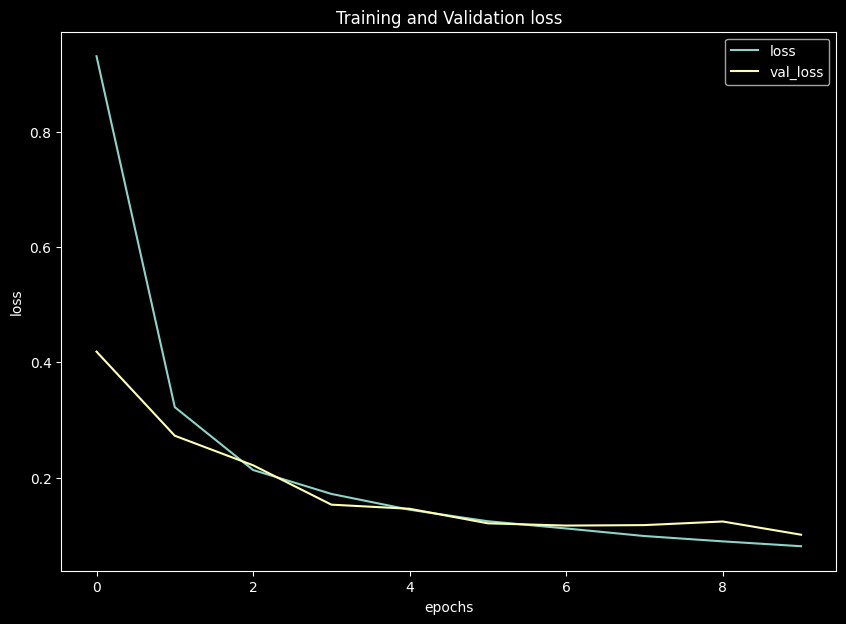

In [ ]:
# Plot the training loss and the validation loss 
fig, ax = plt.subplots(figsize = (10, 7))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()


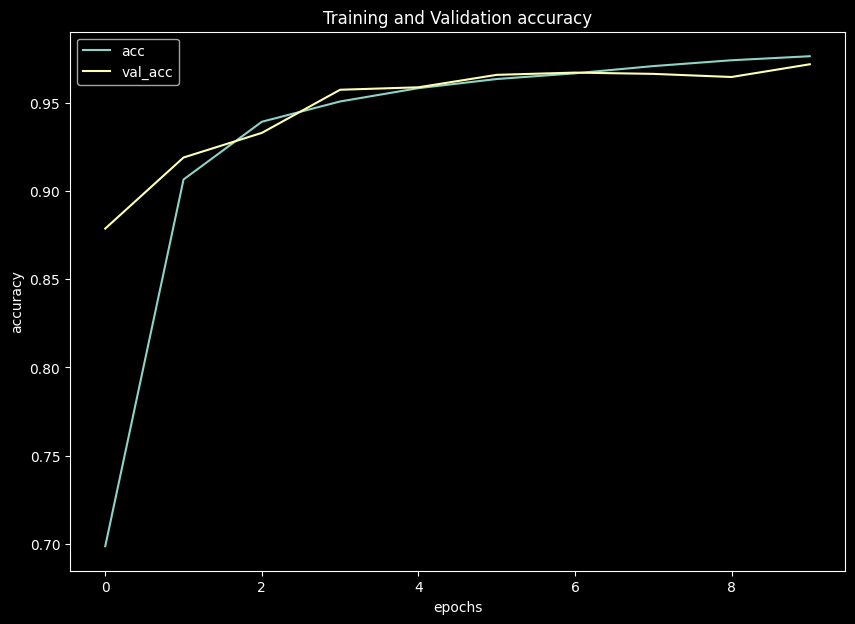

In [ ]:
# Plot the training accuracy and the validation accuracy 
fig, ax = plt.subplots(figsize = (10, 7))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

# Wrap-up

In this programming session, we've learned:

* To code the RNN layer using numpy to understand how data is transformed.
* To perform a classification task on data of shape (N, T, D) using the LSTMs. 





### Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk

